# Numerical Methods for ODE's: Initial Value Problems
---

GENERAL PROBLEM: solve the system of first-order ordinary differential equations of the form

\begin{equation}
  \mathbf{y}'(x) \equiv \frac{d}{dx}\mathbf{y}(x) = \mathbf{f}(\mathbf{y}(x),x)
  \quad\text{with}\quad
  \mathbf{y}(x_{0}) = \mathbf{y}_{0}.
\end{equation}


IDEA: discretize variables by letting $x\rightarrow x_{i}$ and $\mathbf{y}(x_{i})\rightarrow \mathbf{y}_{i}$, for $i=0,\ldots,N$. Then use knowledge about $\mathbf{y}_{i}$'s (and possibly derivatives of $\mathbf{y}$) at "earlier" points to approximate (guess) their values at "later" points. An approximate solution is found in this way by "marching" along the independent variable, starting with the given initial values $\mathbf{y}_{0}$ at $x_{0}$.

PRE-REQUISITES:
- [None]

REFERENCES:
- [1] DeVries and Hasbun, *A First Course in Computational Physics, 2nd edition*.
- [2] Garcia, *Numerical Methods for Physicists, 2nd edition*.
- [3] Burden and Faires, *Numerical Analysis, 7th edition*.


## 1. Euler's Method

To start, consider a first-order ODE with one degree of freedom 

\begin{equation}
  y'(x) = f\left(y(x),x\right)
  \quad,\quad
  \quad\text{with}\quad
  y(x_{0}) = y_{0}.
\end{equation}

Expanding $y(x)$ in a Taylor series about $x_{0}$ gives

\begin{align}
  y(x) &= y(x_{0}) + (x - x_{0})y'(x_{0}) + \frac{(x - x_{0})^2}{2!} y''(x_{0}) + \cdots \\
  &= y(x_{0}) + (x - x_{0})y'(x_{0}) + \frac{(x - x_{0})^2}{2!} y''(\zeta),
\end{align}

where the second line is exact, for some value of $\zeta$ between $x$ and $x_{0}$. Using the differential equation, we can rewrite this as

\begin{align}
  y(x) &= y(x_{0}) + (x - x_{0})f(y_{0}, x_{0}) + \frac{(x - x_{0})^2}{2!} y''(\zeta) \\
  &\approx y(x_{0}) + (x - x_{0})f(y_{0}, x_{0}),
\end{align}


Next we discretize variables by letting $x\rightarrow x_{i}$ and $y(x_{i})\rightarrow y_{i}$, for $i=0,\ldots,N$. Denote the stepsize $x-x_{0}$ by $h$, which we assume to be constant. Then

\begin{align}
  x_{i} &= x_{0} + ih 
  \quad,\quad i = 0,\ldots,N\\
  y_{i+1} &= y_{i} + hf_{i}
  \quad,\quad i = 0,\ldots,N
\end{align}

where $f_{i}\equiv f(y_{i}, x_{i})$. This sets up an iteration scheme. Starting with $x_{0}$ and $y_{0}$, one calculates $f_{0}$, which is then used to calculate $y_{1}$. Then with $x_{1}$ and $y_{1}$ in hand, one repeats this to calculate $y_{2}$, and so on, until the last desired point is reached.





### Truncation error
The error in the above approximation is due to truncating the Taylor series. The error term is

\begin{equation}
  \frac{(x - x_{0})^2}{2!}y''(\zeta)
  = \frac{h^2}{2}y''(\zeta)
  = \mathcal{O}\left(h^2\right)
\end{equation}

### CODE: Euler's method

<IPython.core.display.Javascript object>


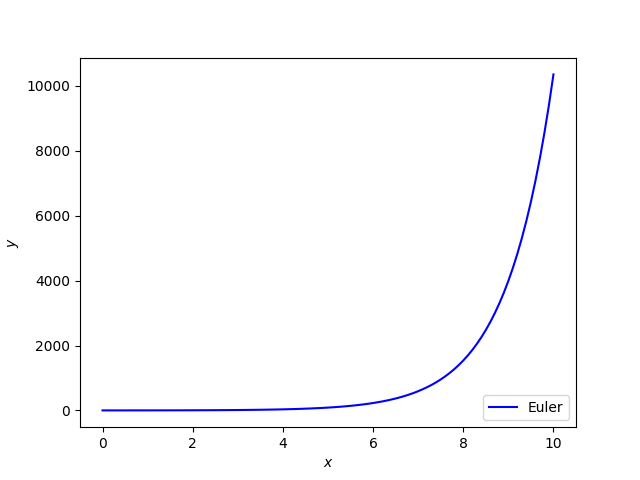

In [34]:
import numpy as np 

# euler step
def euler_step(x, y, f, h):
    """ evolve solution by one step using Euler's method
    INPUT:
    x = current x position
    y = current y values (array)
    f = rhs function handle
    h = stepsize
    
    OUTPUT:
    xnew = new x value
    ynew = new y value
    """
    ynew = y + h*f(x,y)
    xnew = x + h
    return xnew, ynew

# initial conditions
x0 = 0.
y0 = 2.

# rhs function
def f(x,y):
    return y*(1 - np.exp(-x))

# create x-grid and step size
xmin = 0
xmax = 10
nsteps = 100
h = (xmax - xmin)/nsteps
xgrid = np.linspace(xmin, xmax, nsteps+1)

# initialize output arrays
xx = np.zeros_like(xgrid)
yy = np.zeros_like(xgrid)
xx[0] = x0
yy[0] = y0

# evolve solution
for i in range(0,nsteps):
    xx[i+1], yy[i+1] = euler_step(xx[i], yy[i], f, h)

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots(1,1)

ax.plot(xx, yy, 'b-', label='Euler')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.legend(loc="lower right")

fig.show()

In [15]:
np.linspace(0,10,101)

array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
         0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
         1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
         2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
         3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
         4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
         5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
         6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
         7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
         8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
         9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
         9.9,  10. ])